In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, LSTM

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re

In [4]:
with open('lastofus.txt', encoding='euckr') as f:
  line = f.readlines()

  for i in line:
    print(i)

FileNotFoundError: [Errno 2] No such file or directory: 'lastofus.txt'

In [5]:
text = ''

array = []
with open('../Data/lastofus.txt', encoding='euckr') as f:
  lines = f.readlines()
  text = text.join([i for i in lines if re.match(r'^[A-Z].*:', i)])

text

'Joel: Tommy, I-...Tommy. Tommy, listen to me. He\'s the contractor, okay? I\nSarah: Hey.\nJoel: Scoot.\nSarah: Fun day at work, huh?\nJoel: What are you still doing up? It\'s late.\nSarah: Oh crud. What time is it?\nJoel: It\'s way past your bedtime.\nSarah: But it\'s still today.\nJoel: Honey, please not right now. I do not have the energy for this.\nSarah: Here.\nJoel: What\'s this?\nSarah: Your birthday.\nSarah: You kept complaining about your broken watch... So I figured, you know.\nJoel: Honey, this is...\nSarah: What?\nJoel: It\'s nice, but I-...I think it\'s stuck. It\'s not...\nSarah: What? No, no, no, no.\nSarah: Oh, ha, ha.\nJoel: Where did you get the money for this?\nSarah: Drugs. I sell hardcore drugs.\nJoel: Oh, good. You can start helping out with the mortgage then.\nSarah: Stsh - yeah, you wish.\nJoel: Goodnight, baby girl.\nSarah: Hello?\nTommy: Sarah, honey, I need you to get your daddy on the phone.\nSarah: Uncle Tommy, what time is it?\nTommy: I need to talk to you

In [ ]:
print(text)

In [8]:
arr = []
for t in text.split('\n')[:1001]:
  arr.append(t)

In [9]:
tokenizer = Tokenizer(lower=False, filters = '?!.,:;\'\"-%\n')
tokenizer.fit_on_texts(arr)

In [10]:
tokenizer.word_index

{'Joel': 1,
 'Tess': 2,
 'I': 3,
 's': 4,
 'the': 5,
 'you': 6,
 'Ellie': 7,
 'to': 8,
 'it': 9,
 't': 10,
 'we': 11,
 're': 12,
 'a': 13,
 'You': 14,
 'Sarah': 15,
 'this': 16,
 'that': 17,
 'here': 18,
 'We': 19,
 'of': 20,
 'Tommy': 21,
 'up': 22,
 'out': 23,
 'on': 24,
 'What': 25,
 'Marlene': 26,
 'get': 27,
 'is': 28,
 'go': 29,
 'Guard': 30,
 'me': 31,
 'are': 32,
 'there': 33,
 'Let': 34,
 'your': 35,
 'm': 36,
 'do': 37,
 'in': 38,
 'Oh': 39,
 'they': 40,
 'for': 41,
 'just': 42,
 'us': 43,
 'Robert': 44,
 'Yeah': 45,
 'can': 46,
 'It': 47,
 'They': 48,
 'Hey': 49,
 'know': 50,
 'with': 51,
 'what': 52,
 'back': 53,
 'll': 54,
 '2': 55,
 'No': 56,
 'and': 57,
 'way': 58,
 'was': 59,
 'gonna': 60,
 'not': 61,
 'There': 62,
 'be': 63,
 'How': 64,
 'Alright': 65,
 'got': 66,
 'mon': 67,
 'see': 68,
 'That': 69,
 'shit': 70,
 'around': 71,
 'don': 72,
 'C': 73,
 'em': 74,
 'through': 75,
 'This': 76,
 'all': 77,
 'Okay': 78,
 'Look': 79,
 'Man': 80,
 'have': 81,
 'Get': 82,
 'hell

In [11]:
len(tokenizer.word_index)

1311

In [12]:
seq = tokenizer.texts_to_sequences(arr)
seq

[[1, 21, 3, 21, 21, 601, 8, 31, 104, 4, 5, 602, 105, 3],
 [15, 49],
 [1, 603],
 [15, 604, 324, 110, 266, 325],
 [1, 25, 32, 6, 111, 188, 22, 47, 4, 605],
 [15, 39, 606, 25, 132, 28, 9],
 [1, 47, 4, 58, 415, 35, 607],
 [15, 215, 9, 4, 111, 216],
 [1, 326, 416, 61, 92, 84, 3, 37, 61, 81, 5, 608, 41, 16],
 [15, 176],
 [1, 25, 4, 16],
 [15, 327, 609],
 [15, 14, 610, 611, 98, 35, 328, 160, 133, 3, 612, 6, 50],
 [1, 326, 16, 28],
 [15, 25],
 [1, 47, 4, 613, 161, 3, 3, 99, 9, 4, 614, 47, 4, 61],
 [15, 25, 56, 106, 106, 106],
 [15, 39, 417, 417],
 [1, 112, 134, 6, 27, 5, 615, 41, 16],
 [15, 616, 3, 418, 617, 618],
 [1, 39, 113, 14, 46, 619, 620, 23, 51, 5, 621, 189],
 [15, 622, 329, 6, 623],
 [1, 624, 114, 267],
 [15, 330],
 [21, 15, 419, 3, 89, 6, 8, 27, 35, 625, 24, 5, 420],
 [15, 268, 21, 52, 132, 28, 9],
 [21, 3, 89, 8, 331, 8, 35, 626, 84, 62, 4, 149],
 [15, 268, 21, 330],
 [15, 25, 59, 17, 77, 98, 177, 217, 14, 38, 18],
 [269, 47, 627, 17, 52, 11, 628, 629, 270, 630, 631, 8, 63],
 [15, 1

In [13]:
lengths = [len(line) for line in seq]
lengths

[14,
 2,
 2,
 6,
 10,
 7,
 7,
 6,
 14,
 2,
 4,
 3,
 13,
 4,
 2,
 14,
 6,
 4,
 9,
 6,
 12,
 5,
 4,
 2,
 13,
 7,
 12,
 4,
 11,
 13,
 6,
 11,
 4,
 8,
 8,
 5,
 8,
 5,
 7,
 8,
 11,
 4,
 5,
 2,
 6,
 7,
 12,
 12,
 16,
 4,
 3,
 2,
 6,
 4,
 2,
 10,
 4,
 3,
 3,
 4,
 2,
 6,
 16,
 2,
 4,
 2,
 16,
 12,
 9,
 11,
 14,
 6,
 13,
 2,
 8,
 12,
 4,
 2,
 10,
 8,
 6,
 14,
 12,
 8,
 8,
 13,
 2,
 3,
 7,
 17,
 5,
 11,
 6,
 4,
 6,
 5,
 14,
 8,
 6,
 6,
 2,
 7,
 12,
 6,
 4,
 5,
 2,
 4,
 4,
 13,
 5,
 14,
 7,
 9,
 3,
 4,
 3,
 6,
 3,
 10,
 5,
 6,
 5,
 6,
 5,
 4,
 3,
 7,
 9,
 5,
 6,
 4,
 3,
 3,
 4,
 11,
 2,
 13,
 4,
 4,
 3,
 3,
 7,
 4,
 8,
 5,
 6,
 4,
 4,
 6,
 3,
 6,
 5,
 2,
 7,
 3,
 9,
 15,
 2,
 4,
 11,
 7,
 8,
 3,
 5,
 2,
 9,
 3,
 6,
 2,
 7,
 10,
 6,
 15,
 2,
 12,
 4,
 6,
 12,
 6,
 14,
 10,
 13,
 3,
 4,
 3,
 7,
 6,
 16,
 17,
 13,
 11,
 12,
 13,
 15,
 13,
 11,
 13,
 11,
 15,
 4,
 7,
 7,
 9,
 5,
 11,
 8,
 10,
 16,
 15,
 6,
 16,
 3,
 7,
 5,
 8,
 14,
 3,
 16,
 9,
 13,
 5,
 13,
 7,
 6,
 6,
 9,
 6,
 12,
 15,
 8,
 9,
 4,


(array([ 83.,   0.,   0.,  88.,   0.,   0., 113.,   0.,   0.,  95.,   0.,
          0., 102.,   0.,   0.,  87.,   0.,   0.,  53.,   0.,   0.,  63.,
          0.,   0.,   0.,  52.,   0.,   0.,  46.,   0.,   0.,  39.,   0.,
          0.,  33.,   0.,   0.,  46.,   0.,   0.,  36.,   0.,   0.,  36.,
          0.,   0.,  26.,   0.,   0.,   3.]),
 array([ 2.  ,  2.32,  2.64,  2.96,  3.28,  3.6 ,  3.92,  4.24,  4.56,
         4.88,  5.2 ,  5.52,  5.84,  6.16,  6.48,  6.8 ,  7.12,  7.44,
         7.76,  8.08,  8.4 ,  8.72,  9.04,  9.36,  9.68, 10.  , 10.32,
        10.64, 10.96, 11.28, 11.6 , 11.92, 12.24, 12.56, 12.88, 13.2 ,
        13.52, 13.84, 14.16, 14.48, 14.8 , 15.12, 15.44, 15.76, 16.08,
        16.4 , 16.72, 17.04, 17.36, 17.68, 18.  ]),
 <BarContainer object of 50 artists>)

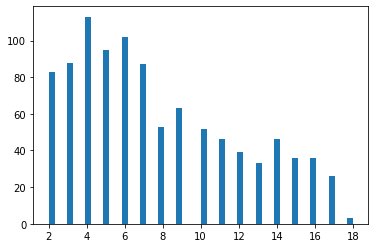

In [14]:
plt.hist(lengths, bins=50)

In [15]:
seq = pad_sequences(seq, maxlen=12)
seq.shape

(1001, 12)

In [16]:
x = seq[:-1]
y = seq[1:]

In [17]:
x.shape

(1000, 12)

In [18]:
y.shape

(1000, 12)

In [19]:
x = x.reshape(1000, 12, 1)
y = y.reshape(1000, 12, 1)

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_oh = to_categorical(y)
y_oh.shape

(1000, 12, 1312)

In [22]:
# x_oh = to_categorical(x)
# x_oh.shape

In [23]:
x.shape

(1000, 12, 1)

In [24]:
y_oh.shape

(1000, 12, 1312)

In [ ]:
model=Sequential()
model.add(Embedding(1312, 20))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(1312, activation='softmax'))
model.summary()

In [25]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(x, y_oh, epochs=300, batch_size=20, validation_split=0.2)

In [27]:
model.save('lastofus_txt.h5')

In [41]:
pred = model.predict(x[30:31])
pred

array([[[7.4044055e-01, 1.5030812e-02, 1.1965322e-02, ...,
         4.4882876e-07, 4.5829611e-07, 4.5327096e-07],
        [7.2165900e-01, 1.6408185e-02, 1.2861840e-02, ...,
         5.4278939e-07, 5.5301911e-07, 5.4837648e-07],
        [6.7340553e-01, 1.9561367e-02, 1.5570279e-02, ...,
         7.2471431e-07, 7.3545823e-07, 7.3046385e-07],
        ...,
        [6.1767444e-02, 1.7619899e-02, 1.1183922e-02, ...,
         1.0493391e-06, 1.1005404e-06, 1.1368936e-06],
        [6.0469225e-02, 1.7262908e-02, 1.0937021e-02, ...,
         1.0460919e-06, 1.0985367e-06, 1.1350567e-06],
        [6.0466390e-02, 1.7262129e-02, 1.0936484e-02, ...,
         1.0460849e-06, 1.0985335e-06, 1.1350533e-06]]], dtype=float32)

In [42]:
pred.shape

(1, 12, 1312)

In [43]:
pred_tok = np.argmax(pred, axis=2)

In [44]:
pred_tok

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
tokenizer.word_index

In [ ]:
idx_word = {}

for w in tokenizer.word_index:
  idx_word[tokenizer.word_index[w]] = w

idx_word

In [ ]:
pred_tok

In [47]:
input_x = x[30:31]

input_txt = [ t[0] for t in input_x[0]]

temp = ''

for t in input_txt:
  if t != 0:
    temp += idx_word[t]
    temp += ' '
temp

'Sarah Where the heck are you '

In [48]:
pred = model.predict(input_x)
pred_tok = np.argmax(pred, axis=2)

temp = ''

for l in pred_tok:
  for w in l:
    if w != 0:
      temp += idx_word[w]
      temp += ' '
temp
                      

''